In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


: 

In [2]:
df=pd.read_csv("PCOS_data_without_infertility.csv")

In [3]:
df.head(10)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 40
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,0,36,65.0,161.5,#NAME?,15,74,20,11.70,2,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,1,33,68.8,165.0,#NAME?,11,72,18,11.80,2,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,0,37,65.0,148.0,#NAME?,13,72,20,12.00,2,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,0,25,52.0,161.0,#NAME?,11,72,18,10.00,2,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
5,0,36,74.1,165.0,#NAME?,15,78,28,11.20,2,...,0.0,0,110,70,9,6,16.0,20.0,8.0,NaN
6,0,34,64.0,156.0,#NAME?,11,72,18,10.90,2,...,0.0,0,120,80,6,6,15.0,16.0,6.8,NaN
7,0,33,58.5,159.0,#NAME?,13,72,20,11.00,2,...,0.0,0,120,80,7,6,15.0,18.0,7.1,NaN
8,0,32,40.0,158.0,#NAME?,11,72,18,11.80,2,...,0.0,0,120,80,5,7,17.0,17.0,4.2,NaN
9,0,36,52.0,150.0,#NAME?,15,80,20,10.00,4,...,0.0,0,110,80,1,1,14.0,17.0,2.5,NaN


In [4]:
df.isnull().sum()

PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
Hip(inch)                   0
Waist(inch)                 0
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(Y/N)              0
Pimples(Y/N)                0
Fast food (Y/N)             1
Reg.Exercise(Y/N)           0
BP _Systol

In [5]:
df['BMI'].value_counts() #Here We Can see That an null value is defined as #NAME? so we need to replace it with np.nan

#NAME?    299
26         10
24.4        8
25.1        7
23.1        7
         ... 
29.5        1
32          1
27.9        1
24.9        1
18.5        1
Name: BMI, Length: 108, dtype: int64

In [6]:
df["BMI"].replace("#NAME?", np.NaN, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     242 non-null    object 
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [8]:
df['BMI']=pd.to_numeric(df["BMI"])

In [9]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [10]:
df.drop("Unnamed: 40",axis=1,inplace=True)

In [11]:
df.dropna(axis=0,inplace=True)

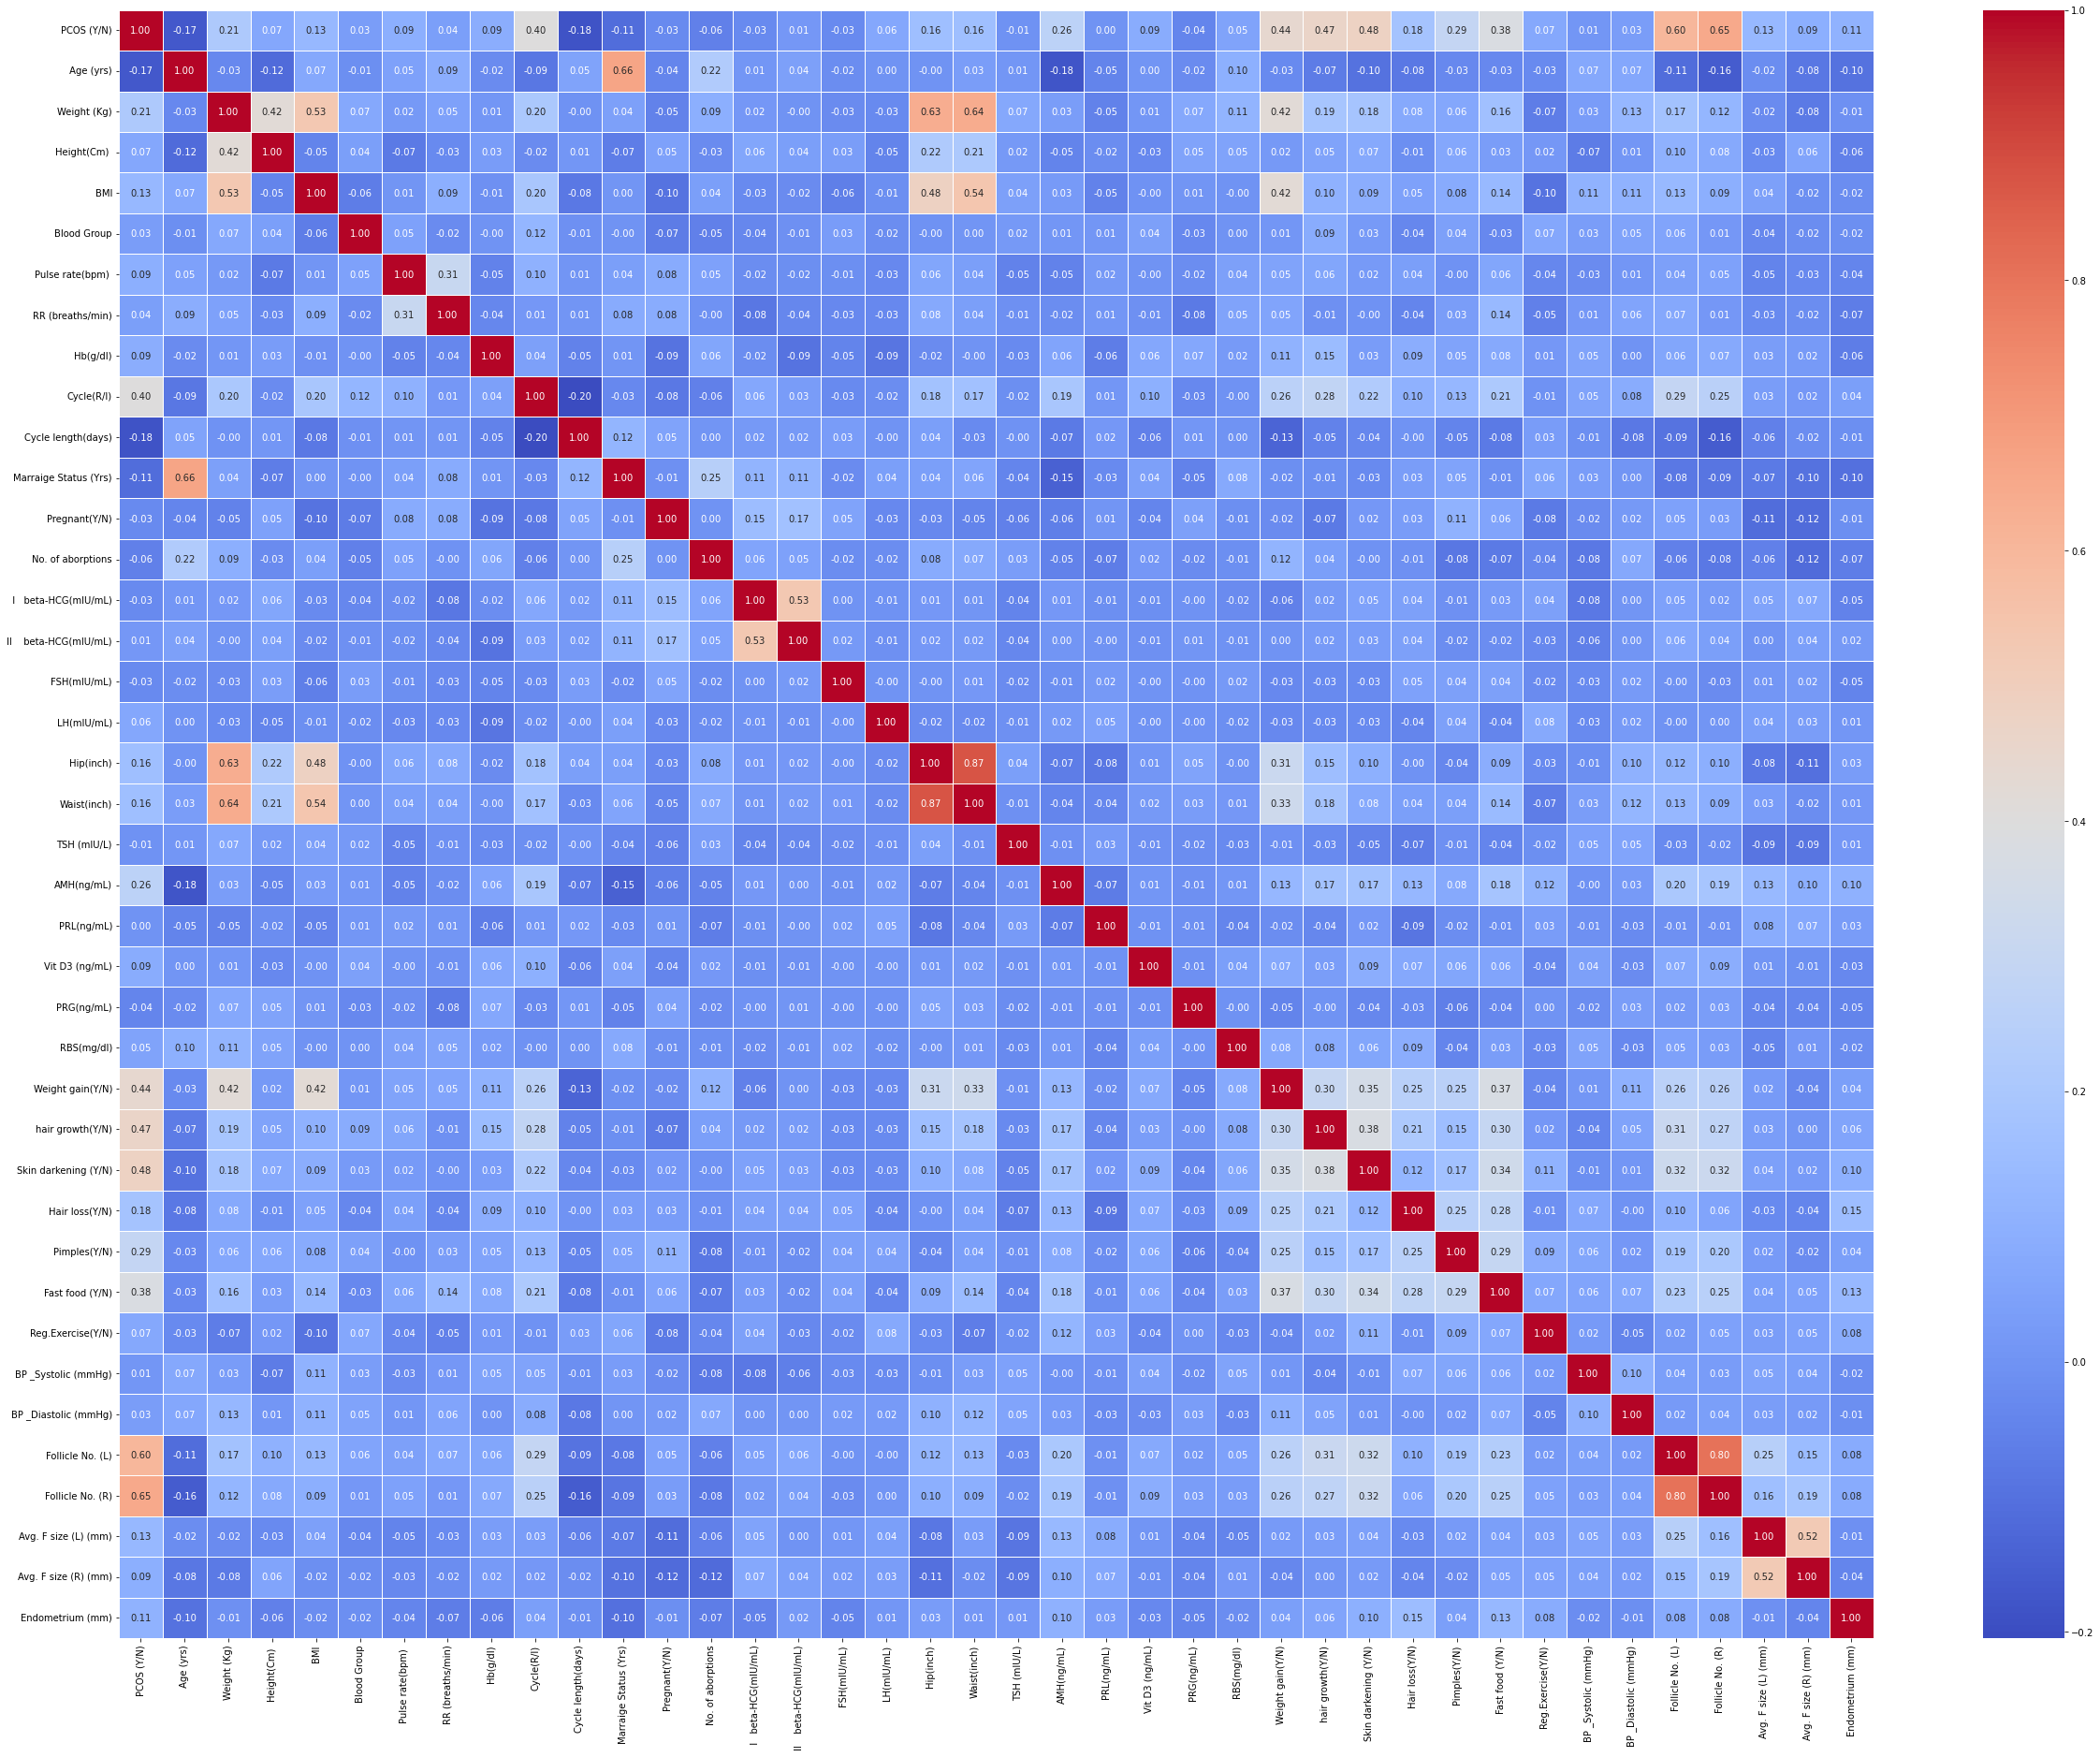

In [12]:
fig, ax = plt.subplots(figsize = (42, 32))
sns.heatmap(df.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()

[]

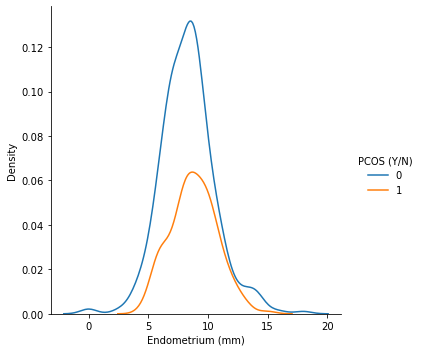

In [13]:
sns.displot(df,x=df['Endometrium (mm)'],kind="kde",hue="PCOS (Y/N)")
plt.plot()

[]

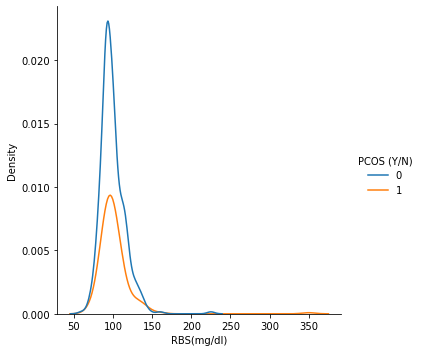

In [14]:
sns.displot(df,x=df['RBS(mg/dl)'],kind="kde",hue="PCOS (Y/N)")
plt.plot()        

[]

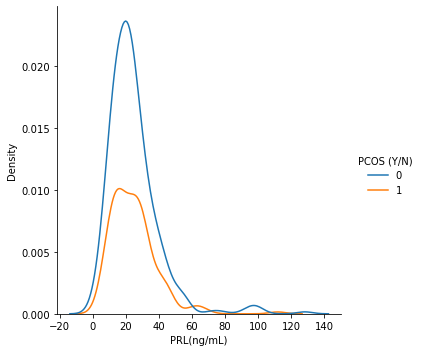

In [35]:
sns.displot(df,x=df['PRL(ng/mL)'],kind="kde",hue="PCOS (Y/N)")
3plt.plot()          

[]

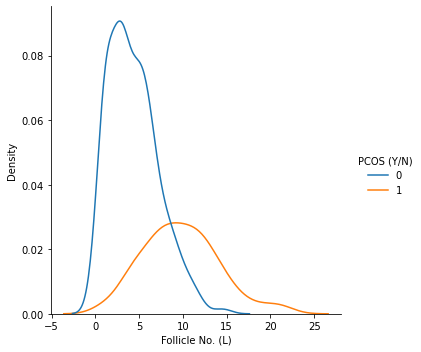

In [15]:
sns.displot(df,x=df['Follicle No. (L)'],kind="kde",hue="PCOS (Y/N)")
plt.plot() 

In [16]:
train, test = train_test_split(df, test_size = 0.2, random_state =1)

In [56]:
train.shape, test.shape

((430, 40), (108, 40))

In [17]:
x_train = train.drop(['PCOS (Y/N)'], axis=1)

In [18]:
x_train.shape

(430, 39)

In [19]:
y_train=train['PCOS (Y/N)']

In [59]:
y_train.shape

(430,)

In [20]:
x_test = test.drop(['PCOS (Y/N)'], axis=1)
y_test = test['PCOS (Y/N)']

In [21]:
ss = StandardScaler()    
x_scaled = ss.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_scaled, columns = x_train.columns)   
x_test_scaled = ss.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [22]:
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
pred = dt.predict(x_test_scaled)
#print(pred)
acc = accuracy_score(y_test, pred)
print(acc)

0.8518518518518519


In [24]:
clf = RandomForestClassifier(max_depth=5, random_state=0,bootstrap=True)
clf.fit(x_train_scaled, y_train)
pred = clf.predict(x_test_scaled)
#print(pred)
acc = accuracy_score(y_test, pred)
acc=(acc*100)
print(acc)

87.96296296296296


In [145]:
LR = LogisticRegression(random_state=0)
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
#print(pred)
acc = accuracy_score(y_test, pred)
print(acc)


0.8518518518518519


In [149]:
confusion_matrix(y_test,pred)  #ratio of tp's, tn's ,fn's,fp's

array([[67,  3],
       [13, 25]], dtype=int64)

In [150]:
linscores = cross_validate(clf, x_train, y_train, scoring="accuracy", cv =5, return_estimator=True)
print(linscores['test_score'])   
#No Overfitting observed in the model as the crossvalidation scores are mostly equivalent to the accuracy score

[0.91860465 0.91860465 0.86046512 0.94186047 0.86046512]


In [78]:
ip3=np.array([[28,44.6,152,19.3,15,78,22,10.48,2,5,7,0,0,1.99,1.99,7.95,3.68,36,30,0.68,2.07,45.16,17.1,0.57,92,0,0,0,0,0,1,0,110,80,3,3,18,18,8.5]])

In [72]:
ip2=np.array([[25,50,152,26,11,74,16,11,2,5,8,1,0,305.76,1.99,5.97,2.73,21,32,3.3,4.5,27.96,19.3,0.25,150,1,0,1,1,1,1,0,110,70,16,14,12,15,7.5]])

In [79]:
ip1=np.array([[31,60,156,24.7,13,72,18,11.9,4,5,10,0,1,1.99,1.99,2.68,0.65,46,36,1,10.04,13.01,41.89,0.24,100,1,1,1,1,1,1,0,110,80,7,5,15,16,8.5]])

In [80]:
pred = clf.predict(ip2)
print(pred)
if pred==1:
    print("PCOS Detected")
else:
    print("PCOS Not Detected")
    

[1]
PCOS Detected
